In [13]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For beautiful statistical plots

# Load dataset
data = pd.read_csv(r'C:\Users\Anastasiia\Documents\GitHub\churn_prediction\data\BankChurners.csv')

# Drop CLIENTNUM and Naive Bayes classifier columns
data.drop(columns=['CLIENTNUM', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
          inplace=True)

# Overview
print("Data Overview:")
display(data.head())
print("Shape of data:", data.shape)
print("Null Values:")
print(data.isnull().sum())



Data Overview:


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Shape of data: (10127, 20)
Null Values:
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [21]:

# Encode target variable and binary features
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})

# One-hot encode categorical features
categorical_cols = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']
for col in categorical_cols:
    if 'Unknown' in data[col].unique():
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col).drop(columns='{}_Unknown'.format(col))], axis=1)
    else:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)

# Drop original categorical columns
data.drop(columns=categorical_cols, inplace=True)

print("Cleaned Data:")
display(data.head())
print("Updated Shape:", data.shape)


Cleaned Data:


C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_8584\2551121044.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_8584\2551121044.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,True,False,False,False,True,False,True,False,False,False
1,0,49,1,5,44,6,1,2,8256.0,864,...,False,False,True,False,False,True,True,False,False,False
2,0,51,0,3,36,4,1,0,3418.0,0,...,False,True,False,False,True,False,True,False,False,False
3,0,40,1,4,34,3,4,1,3313.0,2517,...,False,False,True,False,False,False,True,False,False,False
4,0,40,0,3,21,5,1,0,4716.0,0,...,True,False,False,False,True,False,True,False,False,False


Updated Shape: (10127, 34)


## Analysis of the impact of marital status (Marital_Status) on the probability of customer churn

Grouped Data by Marital Status and Attrition Flag:
  Marital_Status     Attrition_Flag  Count  Total_Trans_Ct  Credit_Limit
0       Divorced  Attrited Customer    121       45.033058   9003.185950
1       Divorced  Existing Customer    627       71.149920   9427.147049
2        Married  Attrited Customer    709       43.019746   7459.989281
3        Married  Existing Customer   3978       65.059326   8186.571619
4         Single  Attrited Customer    668       46.739521   8648.977246
5         Single  Existing Customer   3275       72.043359   9071.218382


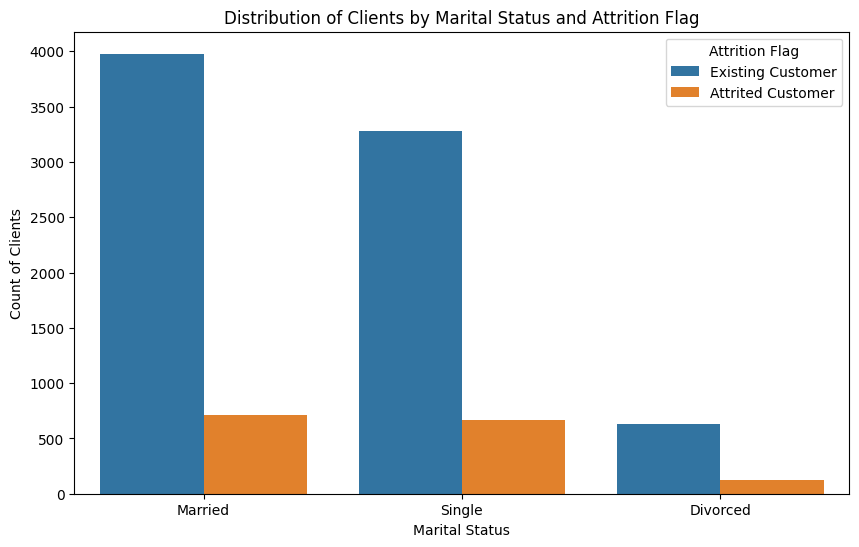

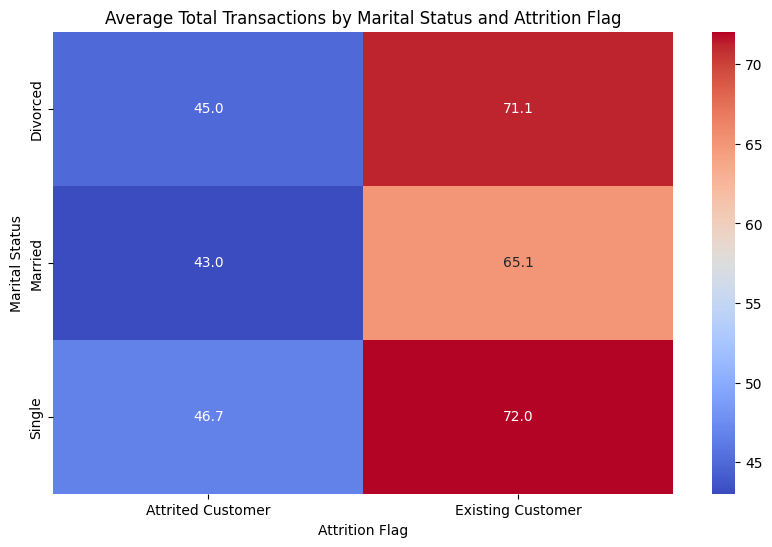

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
file_path = r"C:\Users\Anastasiia\Documents\GitHub\churn_prediction\data\BankChurners.csv"  # Replace with the path to your file
df = pd.read_csv(file_path)

# Exclude 'Unknown' values from 'Marital_Status' if they exist
if 'Unknown' in df['Marital_Status'].unique():
    df = df[df['Marital_Status'] != 'Unknown']

# Grouping customers by Marital_Status and Attrition_Flag
grouped_data = df.groupby(['Marital_Status', 'Attrition_Flag']).agg({
    'Customer_Age': 'mean',       # Mean age of customers
    'Total_Trans_Ct': 'mean',     # Mean total transactions
    'Credit_Limit': 'mean',       # Mean credit limit
    'Customer_Age': 'count'       # Count of customers
}).rename(columns={'Customer_Age': 'Count'}).reset_index()

# Display the grouped table
print("Grouped Data by Marital Status and Attrition Flag:")
print(grouped_data)

# Visualization of the number of clients by Marital_Status and Attrition_Flag
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status', hue='Attrition_Flag')
plt.title("Distribution of Clients by Marital Status and Attrition Flag")
plt.xlabel("Marital Status")
plt.ylabel("Count of Clients")
plt.legend(title="Attrition Flag")
plt.show()

# Heatmap for average Total_Trans_Ct values
pivot_table = grouped_data.pivot(index='Marital_Status', columns='Attrition_Flag', values='Total_Trans_Ct')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Average Total Transactions by Marital Status and Attrition Flag")
plt.xlabel("Attrition Flag")
plt.ylabel("Marital Status")
plt.show()


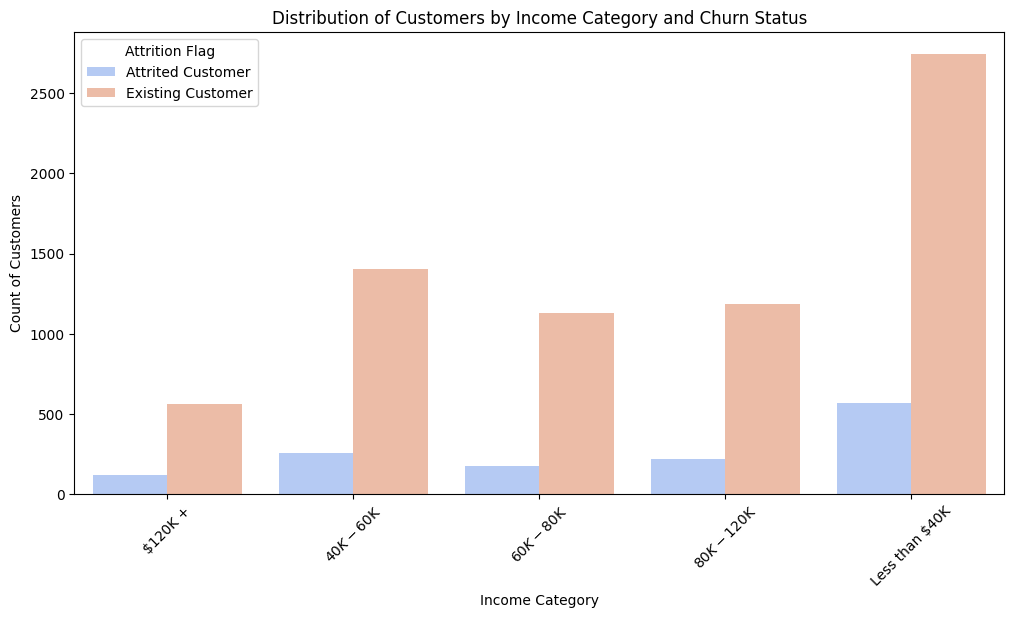

C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_8584\3470629552.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate_data, x='Income_Category', y='Churn_Rate', palette='coolwarm')


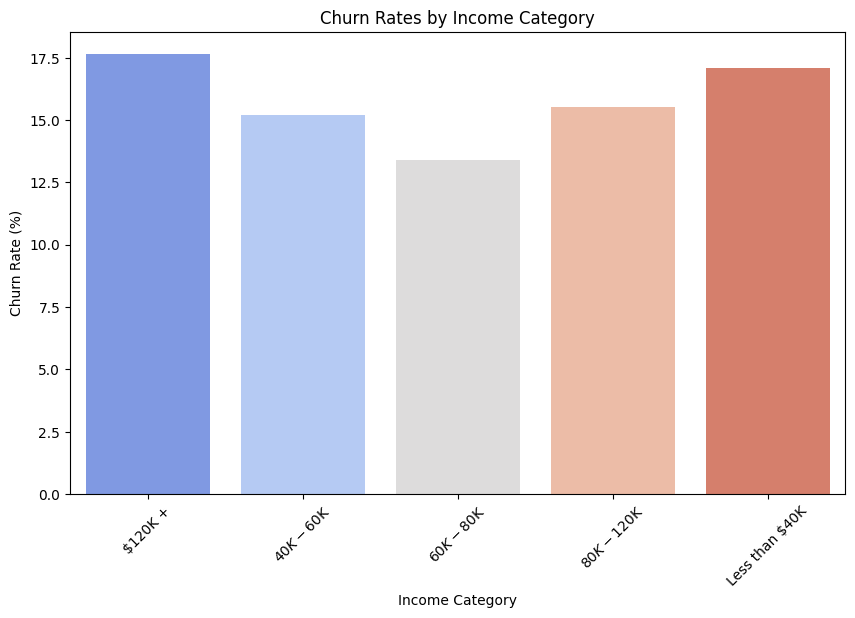

Income Category and Churn Analysis:
  Income_Category     Attrition_Flag  Count  Total_Customers  Churn_Rate
0         $120K +  Attrited Customer    120              680   17.647059
1         $120K +  Existing Customer    560              680   82.352941
2     $40K - $60K  Attrited Customer    252             1658   15.199035
3     $40K - $60K  Existing Customer   1406             1658   84.800965
4     $60K - $80K  Attrited Customer    174             1300   13.384615
5     $60K - $80K  Existing Customer   1126             1300   86.615385
6    $80K - $120K  Attrited Customer    217             1399   15.511079
7    $80K - $120K  Existing Customer   1182             1399   84.488921
8  Less than $40K  Attrited Customer    565             3311   17.064331
9  Less than $40K  Existing Customer   2746             3311   82.935669


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping customers by Income_Category and Attrition_Flag
if 'Unknown' in df['Income_Category'].unique():
    df = df[df['Income_Category'] != 'Unknown']  # Exclude rows with 'Unknown' in Income_Category

income_analysis = df.groupby(['Income_Category', 'Attrition_Flag']).agg({
    'Customer_Age': 'count',  # Count customers in each group
}).rename(columns={'Customer_Age': 'Count'}).reset_index()

# Calculate churn rate within each income category
total_customers_per_income = income_analysis.groupby('Income_Category')['Count'].sum().reset_index()
total_customers_per_income = total_customers_per_income.rename(columns={'Count': 'Total_Customers'})
income_analysis = income_analysis.merge(total_customers_per_income, on='Income_Category')
income_analysis['Churn_Rate'] = (income_analysis['Count'] / income_analysis['Total_Customers']) * 100

# Separate Attrited Customers for visualization of churn rates
churn_rate_data = income_analysis[income_analysis['Attrition_Flag'] == 'Attrited Customer']

# Visualization 1: Distribution of customers by Income Category and Churn Status
plt.figure(figsize=(12, 6))
sns.barplot(data=income_analysis, x='Income_Category', y='Count', hue='Attrition_Flag', palette='coolwarm')
plt.title("Distribution of Customers by Income Category and Churn Status")
plt.ylabel("Count of Customers")
plt.xlabel("Income Category")
plt.xticks(rotation=45)
plt.legend(title="Attrition Flag")
plt.show()

# Visualization 2: Churn rates by Income Category
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_rate_data, x='Income_Category', y='Churn_Rate', palette='coolwarm')
plt.title("Churn Rates by Income Category")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Income Category")
plt.xticks(rotation=45)
plt.show()

# Display the summarized data for reference
print("Income Category and Churn Analysis:")
print(income_analysis)


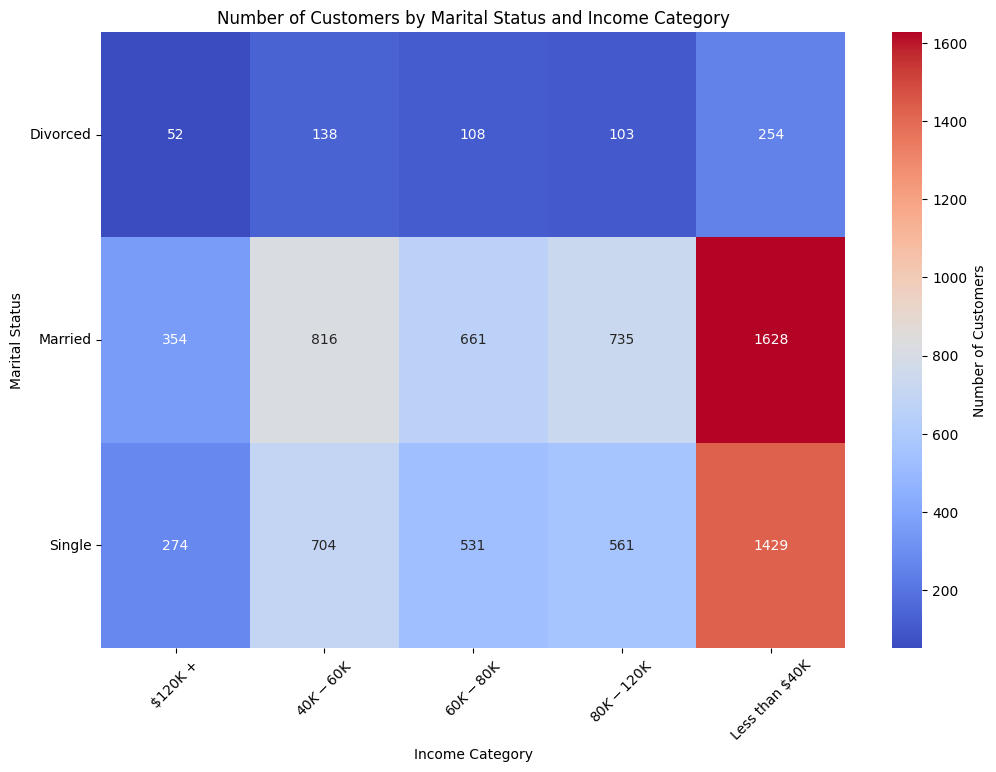

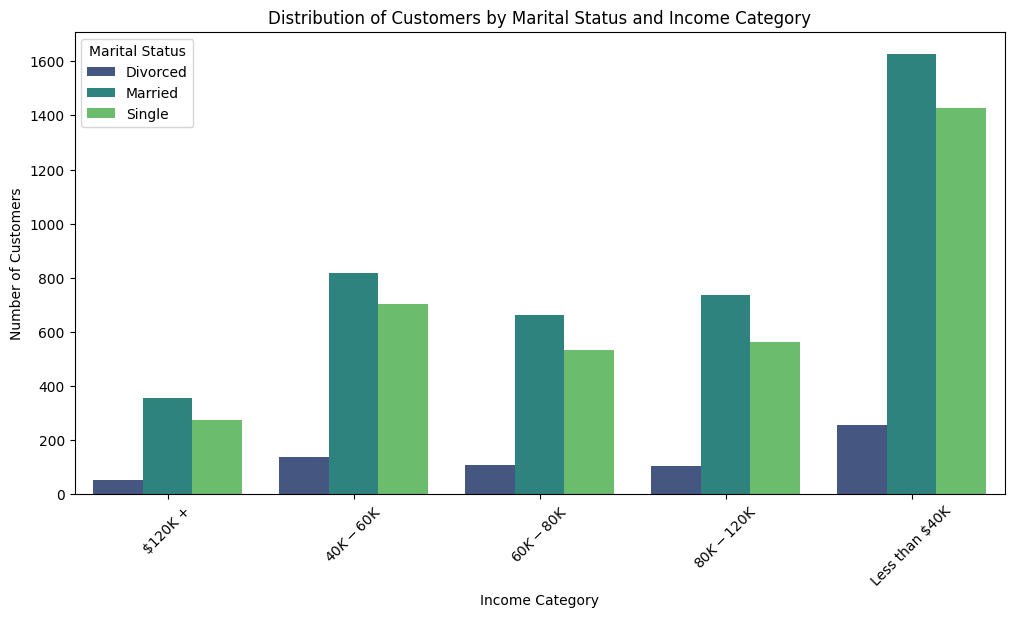

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loading the dataset
file_path = r"C:\Users\Anastasiia\Documents\GitHub\churn_prediction\data\BankChurners.csv"  # Replace with the path to your file
df = pd.read_csv(file_path)

# Check and drop rows with 'Unknown' in relevant columns if present
if 'Unknown' in df['Income_Category'].unique():
    df = df[df['Income_Category'] != 'Unknown']
if 'Unknown' in df['Marital_Status'].unique():
    df = df[df['Marital_Status'] != 'Unknown']

# Grouping customers by Marital_Status and Income_Category
marital_income_analysis = df.groupby(['Marital_Status', 'Income_Category']).agg({
    'Customer_Age': 'count'  # Count the number of customers
}).rename(columns={'Customer_Age': 'Count'}).reset_index()

# Visualization 1: Heatmap of Count of Customers by Marital_Status and Income_Category
pivot_table = marital_income_analysis.pivot(index='Marital_Status', columns='Income_Category', values='Count')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Number of Customers'})
plt.title("Number of Customers by Marital Status and Income Category")
plt.ylabel("Marital Status")
plt.xlabel("Income Category")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Visualization 2: Stacked Bar Plot for Marital_Status and Income_Category
plt.figure(figsize=(12, 6))
sns.barplot(data=marital_income_analysis, x='Income_Category', y='Count', hue='Marital_Status', palette='viridis')
plt.title("Distribution of Customers by Marital Status and Income Category")
plt.ylabel("Number of Customers")
plt.xlabel("Income Category")
plt.xticks(rotation=45)
plt.legend(title="Marital Status")
plt.show()

